<a href="https://colab.research.google.com/github/Massato01/ProjetoCalculoNumericoRegressaoLinear/blob/main/ProjetoCalculoNumerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [214]:
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns
import plotly.express        as px
from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split

# **Importação e tratamento dos dados**

In [215]:
df_breast_cancer = pd.read_csv('/content/BreastCancer.csv')
df_breast_cancer.shape

(699, 11)

## Verificando as colunas presentes

In [216]:
[i for i in df_breast_cancer.columns]

['Id',
 'Cl.thickness',
 'Cell.size',
 'Cell.shape',
 'Marg.adhesion',
 'Epith.c.size',
 'Bare.nuclei',
 'Bl.cromatin',
 'Normal.nucleoli',
 'Mitoses',
 'Class']

## Verificando o tipo dos dados

In [217]:
df_breast_cancer.dtypes

Id                   int64
Cl.thickness         int64
Cell.size            int64
Cell.shape           int64
Marg.adhesion        int64
Epith.c.size         int64
Bare.nuclei        float64
Bl.cromatin          int64
Normal.nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

## Verificando NaN

In [218]:
df_breast_cancer.isna().any()

Id                 False
Cl.thickness       False
Cell.size          False
Cell.shape         False
Marg.adhesion      False
Epith.c.size       False
Bare.nuclei         True
Bl.cromatin        False
Normal.nucleoli    False
Mitoses            False
Class              False
dtype: bool

### Tratando $Bare.nuclei$

In [219]:
df_breast_cancer.loc[df_breast_cancer['Bare.nuclei'].isna()] = -1

In [220]:
np.unique(df_breast_cancer['Bare.nuclei'])

array([-1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [221]:
df_breast_cancer['Bare.nuclei'] = df_breast_cancer['Bare.nuclei'].astype('int64')

# **Análises preliminares**

In [222]:
df_breast_cancer.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


## Estatística descritiva

In [223]:
df_breast_cancer.describe().round(2)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
count,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00,699.00
mean,1052074.25,4.32,3.06,3.12,2.74,3.14,3.44,3.34,2.78,1.54,0.32
std,634299.48,2.90,3.09,3.02,2.89,2.29,3.67,2.51,3.07,1.76,0.51
min,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,846627.50,2.00,1.00,1.00,1.00,2.00,1.00,2.00,1.00,1.00,0.00
50%,1168736.00,4.00,1.00,1.00,1.00,2.00,1.00,3.00,1.00,1.00,0.00
75%,1237847.50,6.00,4.50,5.00,3.00,4.00,5.00,4.00,3.00,1.00,1.00
max,13454352.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,1.00


## Mapa de correlação

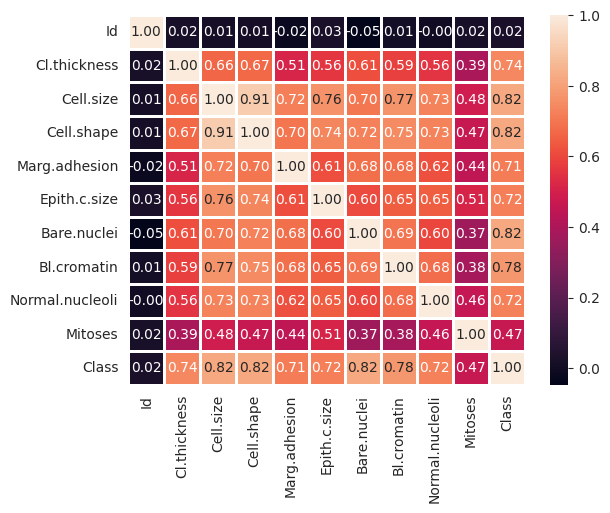

In [224]:
corr = df_breast_cancer.corr().round(4)
ax = sns.heatmap(corr, annot = True, fmt=".2f", linewidths=.8)

> ### Correlações fortes (exemplos):
> * Cl.thickness & Cell.size
> * Cl.thickness & Cell.shape
> * Cl.thickness & Bare.nuclei
> * Cell.size & Cl.thickness
> * Cell.size & Cell.shape
> * Cell.size & Epith.c.size
> * Cell.size & Bare.nuclei
> * Cell.size & Bl.cromatin
> * Cell.size & Normal.nucleoli

**Obs: Class possui forte correlação com todas as colunas**

# **Análises gráficas**

In [225]:
sns.set_palette("Set2")
sns.set_style("darkgrid")

## Visualizando o comportamento entre as colunas

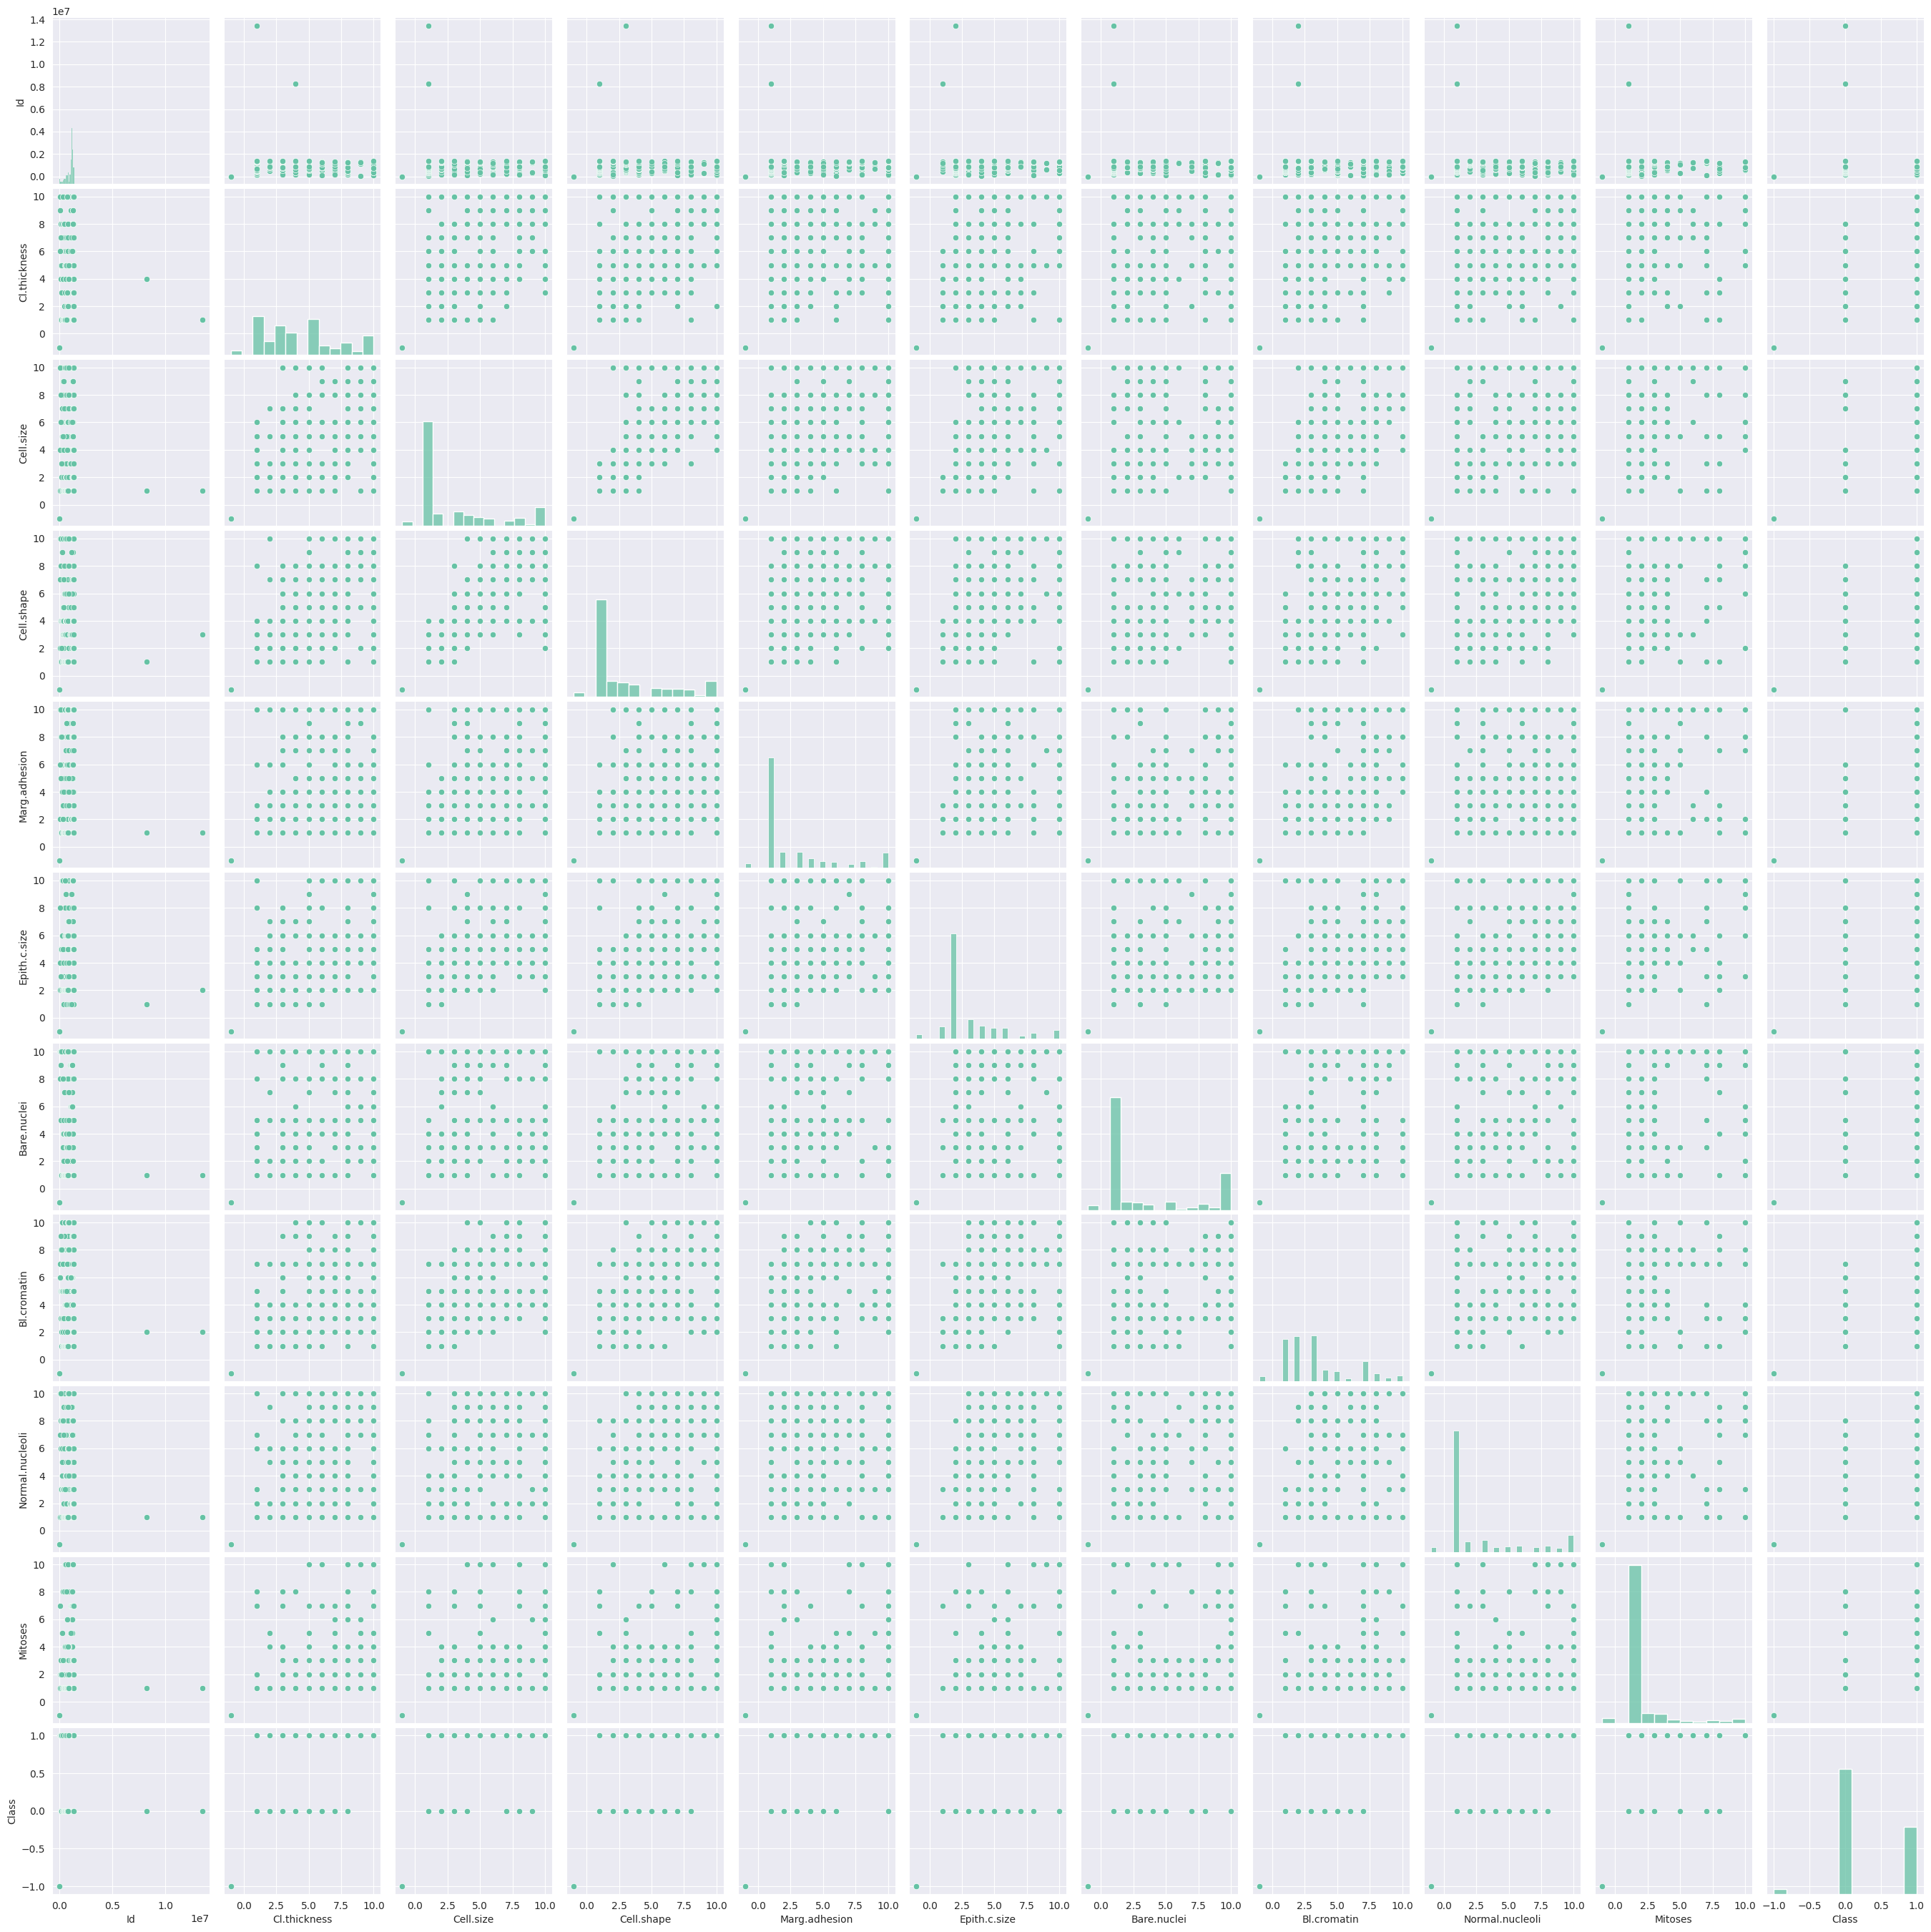

In [236]:
ax = sns.pairplot(df_breast_cancer)

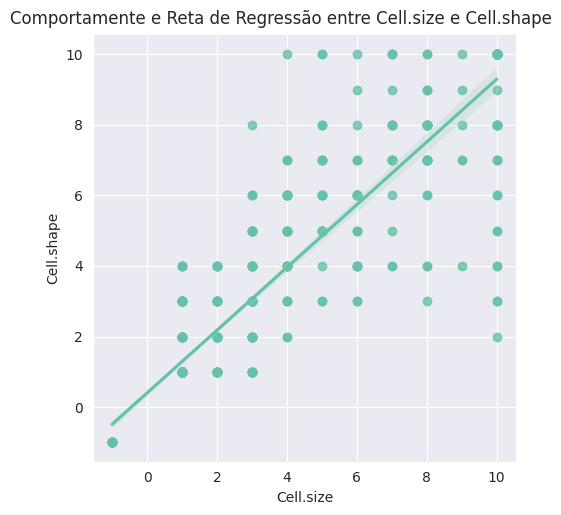

In [227]:
ax = sns.lmplot(x = 'Cell.size', y = 'Cell.shape', data = df_breast_cancer);
ax.fig.suptitle('Comportamente e Reta de Regressão entre Cell.size e Cell.shape',
                y = 1.02);

# **Regrassão Linear**

## Variáveis Dependente e Indepentente

In [228]:
# Variável dependente
y = df_breast_cancer['Cell.size'].values

# Variável independente
X = df_breast_cancer['Cell.shape'].values
X = X.reshape(-1, 1)

In [229]:
# print(f'{y = }\n{X = }')

## Separando dados de treino e teste

In [230]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 2424
)

print(f'{len(X_train) = }\n{len(y_train) = }\n\n{len(X_test) = }\n{len(y_test) = }')

len(X_train) = 489
len(y_train) = 489

len(X_test) = 210
len(y_test) = 210


## Criando o modelo

In [231]:
modelo = LinearRegression()

In [232]:
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de Determinação (R²)

In [233]:
print(f'R² = {modelo.score(X_train, y_train).round(2)}')

R² = 0.83


### Coeficiente de Correlação

In [234]:
dict_size_shape = pd.DataFrame({
    df_breast_cancer.columns[2] : df_breast_cancer['Cell.size'],
    df_breast_cancer.columns[3] : df_breast_cancer['Cell.shape'],
})

dict_size_shape_corr = dict_size_shape.corr()
print(f'Coeficiente de Correlação: {dict_size_shape_corr.iloc[0, 1].round(2)}')

Coeficiente de Correlação: 0.91


## Gráfico da Regressão Linear

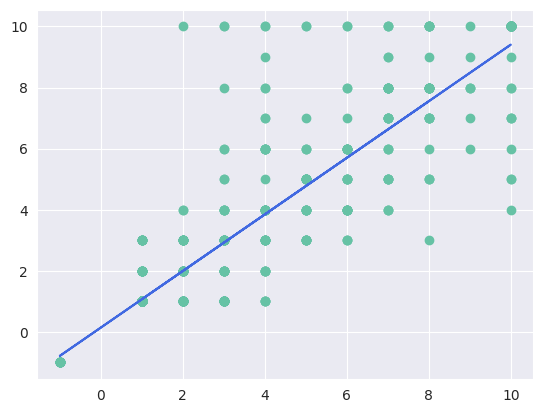

In [235]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'royalblue')